In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [2]:
cols = ['Cycle', 'Date', 'Time', 'RelTime[s]'] + [str(i+1) for i in range(20)]

In [3]:
data = pd.read_csv('s220403.asc', sep = '\t', names = cols)
data = data.drop(labels=range(0,73), axis=0)

In [4]:
data = data.iloc[1:]
data = data.drop(['20'], axis = 1)
cols_to_float = ['RelTime[s]'] + [str(i+1) for i in range(19)]
data[cols_to_float] = data[cols_to_float].astype(float)

In [5]:
import datetime

In [6]:
datetime_start = datetime.datetime.strptime('22:42:03', '%H:%M:%S')


In [7]:
data = data[data['Time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S:%f'))>datetime_start]

In [8]:
#Date and time: 17.02.2022 16:23:37


In [9]:
# temp = pd.read_csv('/content/temp_WYCr 3.txt', sep="\t")
temp = pd.read_csv('temp_S220403.txt', sep="\t")
# temp = np.loadtxt('temp_S220403.txt', skiprows=6)
# temp
for col in temp.columns:
  temp[col] = temp[col].apply(lambda x: float(x.replace(',','.')))

In [10]:
data['RelTime[s]'] = data['RelTime[s]'] - data['RelTime[s]'].iloc[0]

In [11]:
data.head()

,Cycle,Date,Time,RelTime[s],1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,19
101,74,19.04.2022,22:42:04:34,0.000,1.581580e-10,5.268910e-13,1.457010e-13,8.508510e-14,9.213310e-12,7.780510e-13,...,6.284010e-10,2.281850e-09,1.053330e-11,4.721540e-12,1.933300e-10,9.718810e-13,9.953430e-13,4.964060e-13,1.041500e-12,9.473110e-12
102,75,19.04.2022,22:42:06:43,2.094,2.102560e-09,2.541630e-12,1.598410e-13,1.324050e-13,2.416510e-11,2.096190e-12,...,5.665210e-10,1.856860e-09,8.076260e-12,3.692780e-12,1.594320e-10,1.148420e-12,1.869140e-12,5.205210e-13,1.943310e-12,1.071980e-11
103,76,19.04.2022,22:42:08:53,4.187,3.817910e-09,4.418510e-12,2.469030e-13,5.222620e-14,2.381020e-11,3.388390e-12,...,3.294660e-10,1.045390e-09,5.418150e-12,2.397850e-12,2.027030e-10,1.524250e-12,1.746750e-12,7.261810e-13,3.283740e-12,1.642100e-11
104,77,19.04.2022,22:42:10:60,6.265,7.104830e-09,9.100010e-12,3.920730e-13,7.052510e-14,3.469830e-11,3.786970e-12,...,1.940580e-10,5.933210e-10,3.295110e-12,1.607970e-12,3.290250e-10,1.624350e-12,1.544730e-12,6.188010e-13,2.300480e-12,1.921470e-11
105,78,19.04.2022,22:42:12:68,8.344,6.444710e-09,9.172810e-12,3.364040e-13,6.370000e-14,6.546090e-11,3.295110e-12,...,1.191190e-10,3.584490e-10,2.386930e-12,1.051960e-12,6.278550e-10,2.160800e-12,1.453270e-12,5.214310e-13,1.716260e-12,1.369100e-11


In [12]:
temp.head()

,"t, s","Tg, C","Tr, C","P, %"
0,0.14,30.0,29.24,0.0
1,0.25,30.0,30.00,30.0
2,0.36,30.0,30.00,30.0
3,0.48,30.0,30.00,30.0
4,0.59,30.0,30.00,30.0


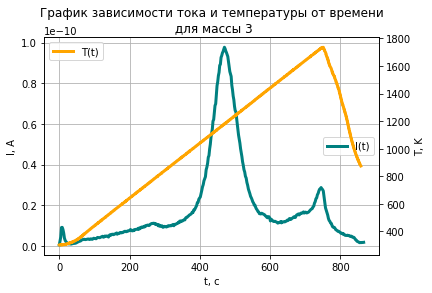

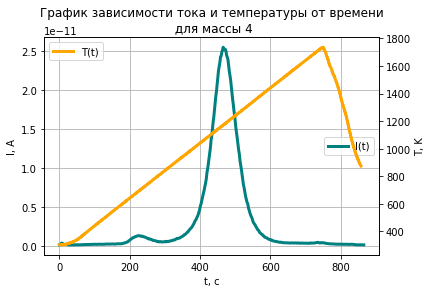

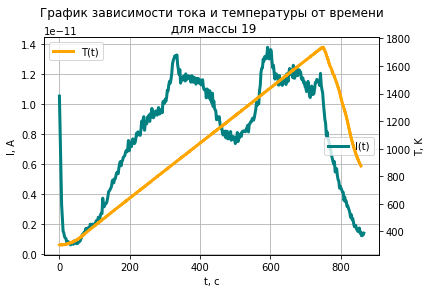

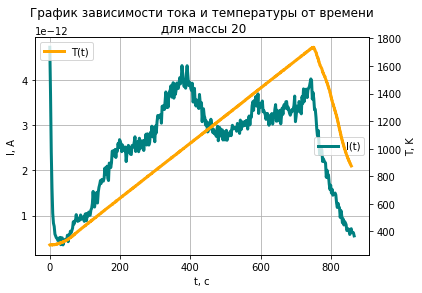

In [36]:
titles = [3, 4, 19, 20]
arr_of_integrals = []
for idx, need_col in enumerate(['2', '3', '12', '13']):
  x = data['RelTime[s]']
  y = data[need_col]
  arr_of_integrals.append(np.trapz(y, x))
  x1 = temp['t, s']
  y1 = temp['Tr, C'] + 273
  fig,ax = plt.subplots()
  ax.plot(x, y, color='teal',linewidth=3, label = "I(t)")
  ax.grid()


  ax.set_title(f'График зависимости тока и температуры от времени\n для массы {titles[idx]}')
  ax.set_ylabel('I, A')
  ax.set_xlabel('t, с')
  ax2 = ax.twinx()
  ax2.plot(x1, y1, color='orange', linewidth=3, label = "T(t)")

  # Align to 0
  #ax2.set_ylim(bottom=0)
  ax2.set_ylabel('T, K')
  ax.legend(loc='center right')
  ax2.legend(loc='upper left')


  plt.show()


In [14]:
arr_of_integrals

[1.6052438812730996e-08,
 2.6260880864209995e-09,
 6.855391582299999e-09,
 2.205187228989e-09]

In [15]:
calibr = pd.read_csv('calibr_(s220403).asc', sep = '\t', names = cols)
calibr=calibr.drop(labels=range(0,28), axis=0)
calibr

,Cycle,Date,Time,RelTime[s],1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,19,20
28,1,19.04.2022,23:53:53:00,0,6.3964E-011,5.369E-013,1.47804E-013,8.78151E-014,1.49559E-012,3.3124E-013,...,2.64628E-011,5.19156E-013,3.50786E-013,7.12849E-012,4.6774E-013,5.96961E-013,3.4671E-013,3.3761E-013,2.66676E-012,NaN
29,2,19.04.2022,23:53:55:09,2.094,6.46874E-011,5.48276E-013,1.50328E-013,1.63345E-013,1.66485E-012,4.46355E-013,...,2.6704E-011,4.37255E-013,3.49915E-013,7.0698E-012,4.3589E-013,5.67841E-013,2.58895E-013,3.8948E-013,2.5885E-012,NaN
30,3,19.04.2022,23:53:57:18,4.187,6.33543E-011,5.58286E-013,1.51759E-013,1.22296E-013,1.42779E-012,3.81745E-013,...,2.63437E-011,6.15161E-013,3.46255E-013,7.58941E-012,4.1587E-013,4.86851E-013,2.98935E-013,3.49895E-013,2.80144E-012,NaN
31,4,19.04.2022,23:53:59:28,6.281,6.39685E-011,5.61471E-013,1.54473E-013,1.27519E-013,1.37274E-012,3.4034E-013,...,2.6613E-011,4.186E-013,3.89025E-013,7.51979E-012,4.41805E-013,5.18245E-013,2.70725E-013,4.18145E-013,2.50478E-012,NaN
32,5,19.04.2022,23:54:01:35,8.359,6.32724E-011,5.91046E-013,1.50881E-013,9.37301E-014,1.54427E-012,3.6036E-013,...,2.61125E-011,4.73655E-013,3.2396E-013,7.14078E-012,4.28155E-013,6.29721E-013,2.84375E-013,4.06315E-013,2.68405E-012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,277,20.04.2022,0:02:52:68,539.687,1.47648E-010,2.56939E-011,5.07882E-009,4.81845E-013,1.94695E-012,5.59195E-013,...,4.6501E-011,1.69033E-012,6.45191E-013,4.10046E-011,5.00955E-013,4.9231E-012,2.99845E-013,8.84521E-013,2.87879E-012,NaN
305,278,20.04.2022,0:02:54:56,541.562,1.47408E-010,2.67267E-011,5.07729E-009,4.2588E-013,1.71717E-012,4.88216E-013,...,4.65283E-011,1.78861E-012,5.68296E-013,4.13732E-011,4.5409E-013,4.93994E-012,2.73E-013,9.95541E-013,2.72882E-012,NaN
306,279,20.04.2022,0:02:56:45,543.453,1.4874E-010,2.61534E-011,5.08214E-009,4.67285E-013,1.83866E-012,4.3953E-013,...,4.58504E-011,1.99927E-012,5.96506E-013,4.03494E-011,4.4408E-013,4.49313E-012,2.548E-013,9.73246E-013,2.70531E-012,NaN
307,280,20.04.2022,0:02:58:32,545.328,1.47375E-010,2.58395E-011,5.07433E-009,4.77295E-013,1.63072E-012,4.1223E-013,...,4.50223E-011,1.70807E-012,5.86041E-013,4.07999E-011,3.9312E-013,4.44262E-012,3.3215E-013,9.90991E-013,2.94613E-012,NaN


In [16]:
calibr = calibr.iloc[2:]
calibr = calibr.drop(labels=['20'], axis=1)
cols_to_float = ['RelTime[s]'] + [str(i+1) for i in range(19)]
# cols_to_float
calibr[cols_to_float] = calibr[cols_to_float].astype(float)
calibr = calibr[calibr['RelTime[s]'] > temp['t, s'].iloc[0]]

In [17]:
y_calibr = calibr['3']
x_calibr = calibr['RelTime[s]']
x_calibr

30       4.187
31       6.281
32       8.359
33      10.453
34      12.531
        ...   
304    539.687
305    541.562
306    543.453
307    545.328
308    547.203
Name: RelTime[s], Length: 279, dtype: float64

In [18]:
I0 = calibr[ calibr['RelTime[s]'] > 500]['3'].mean()
I0 = [I0 for i in range(len(x_calibr))]

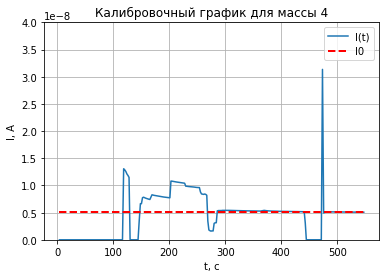

In [19]:
plt.plot(x_calibr, y_calibr, label='I(t)')
plt.plot(x_calibr, I0,  '--', color='red', linewidth=2 , label='I0')
plt.xlabel('t, c')
plt.ylabel('I, A')
plt.title('Калибровочный график для массы 4')
plt.ylim([0,0.4e-7])
plt.grid()

plt.legend()
plt.show()

In [20]:
# baratron = pd.read_csv('/content/baratron_(wycr 3).txt', sep="\t", names = ['t','P'])
baratron = pd.read_csv('baratron_(s220403).dat', sep="\t", names = ['t','P'])
baratron['t'] = baratron['t'].apply(lambda x: float(x.replace(',','.')))
baratron['P'] = baratron['P'].apply(lambda x: float(x.replace(',','.')))

In [21]:
x_bara = baratron['t']
y_bara = baratron['P'] * 0.750062 # to Torr

In [22]:
from scipy.optimize import curve_fit

In [23]:
def objective(x, a, b):
	return a * x + b

In [24]:
fit_x = x_bara[150:300]
fit_y = y_bara[150:300]

In [25]:
popt, _ = curve_fit(objective, fit_x, fit_y)
a, b = popt

In [26]:
x_line = np.arange(min(fit_x), max(fit_x), 1)

In [27]:
y_line = objective(x_line, a, b)

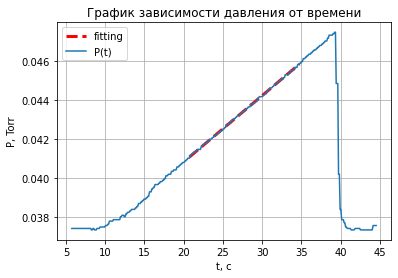

In [28]:
plt.plot(x_line, y_line, '--', color='red', linewidth=3, label = "fitting")
plt.plot(x_bara, y_bara, label = "P(t)")
plt.xlabel('t, c')
plt.grid()
plt.ylabel('P, Torr')
plt.title('График зависимости давления от времени')
plt.legend()
plt.show()

In [29]:
a, I0[0]

(0.0003397107774464314, 5.098978461538462e-09)

In [30]:
 5.2e-2 * a/I0[0]

3464.411658229395

In [31]:
k = 3.5e19 * 5.2e-2 * a/I0[0]
k

1.2125440803802883e+23

In [32]:
integrals_prod_coef = k * np.array(arr_of_integrals)

In [33]:
coef = [0.5, 2, 0.5, 2]
for idx, c in enumerate(coef):
  integrals_prod_coef[idx]*=c

In [34]:
integrals_prod_coef

array([9.73214483e+14, 6.36849513e+14, 4.15623224e+14, 5.34777344e+14])

In [35]:
integrals_prod_coef.sum()/1e15

2.5604645638700845